In [1]:
import numpy

def Linear(x, W, b):
    return numpy.dot(W.T, x.T) + b

In [2]:
x = numpy.array([-1, 0]) # dim -> 1xn

W = numpy.array([ # dim: nxm
    [0.1, 0.2, 0.05],
    [-0.1, 0.4, -0.25],
])

b = 0.1

In [3]:
x.shape

(2,)

In [4]:
Linear(x, W, b)

array([ 0.  , -0.1 ,  0.05])

In [5]:
def ReLU(h):
    # return [max(0, hj) for hj in h]
    return numpy.maximum(0, h)

In [6]:
ReLU(Linear(x, W, b))

array([0.  , 0.  , 0.05])

In [7]:
def Sigmoid(h):
    #return numpy.array([numpy.exp(hj) / (1 + numpy.exp(hj)) for hj in h])
    h = numpy.clip(h, -500, 500)   # evita overflow en exp
    return 1.0 / (1.0 + numpy.exp(-h))

In [8]:
Sigmoid(Linear(x, W, b))

array([0.5       , 0.47502081, 0.5124974 ])

In [9]:
x = numpy.array([1, 2, 3]) # n

W = numpy.random.random((3, 2)) # n x m
b = numpy.random.random()

y = numpy.array([4, 5]) # m

In [10]:
x, Linear(x, W, b)

(array([1, 2, 3]), array([3.43425637, 1.05833671]))

In [11]:
W = W + 0.01 * (y - Linear(x, W, b))

x, Linear(x, W, b), ((y - Linear(x, W, b)) ** 2).sum()

(array([1, 2, 3]), array([3.46820098, 1.29483651]), 14.011046709680803)

In [12]:
mu = 24.1
sigma = 5

numpy.random.normal(mu, sigma, 100).round(0)

array([27., 24., 25., 28., 34., 27., 22., 33., 18., 22., 28., 26., 28.,
       26., 19., 22., 19., 32., 23., 29., 24., 22., 25., 11., 26., 27.,
       25., 21., 20., 24., 21., 32., 24., 15., 27., 27., 15., 23., 22.,
       28., 29., 14., 26., 30., 35., 25., 28., 20., 29., 11., 26., 16.,
       23., 32., 38., 27., 31., 22., 23., 24., 28., 34., 26., 23., 21.,
       25., 28., 23., 22., 27., 38., 25., 24., 30., 31., 16., 29., 25.,
       28., 31., 20., 26., 16., 33., 22., 27., 27., 29., 18., 20., 25.,
       29., 26., 21., 30., 20., 22., 24., 18., 27.])

> `x` - Representa la imagen en una forma aplicada (vector de pixeles)

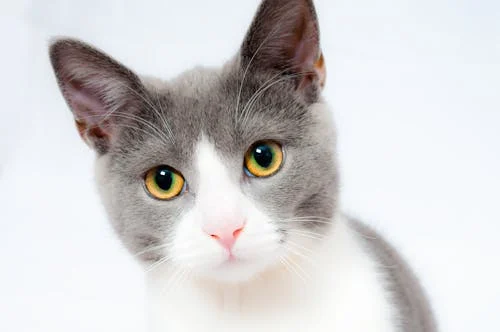

In [13]:
# pip install pillow
from PIL import Image

image = Image.open("cat.png")

image

In [14]:
n = min(image.width, image.height)
m = max(image.width, image.height)
x1, y1 = 0, 0
x2, y2 = n, n
image_x = image.convert("L").crop((x1, y1, x2, y2)).resize((28, 28))
image_x

In [16]:
x = numpy.array(image_x).flatten() / 255
x

array([0.92941176, 0.92941176, 0.90980392, 0.89803922, 0.90588235,
       0.91764706, 0.90980392, 0.90980392, 0.91764706, 0.93333333,
       0.93333333, 0.93333333, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94509804, 0.94509804,
       0.96078431, 0.81568627, 0.23921569, 0.23137255, 0.3254902 ,
       0.29019608, 0.60392157, 0.97254902, 0.93333333, 0.92941176,
       0.90588235, 0.89411765, 0.90588235, 0.91764706, 0.91372549,
       0.91764706, 0.92941176, 0.9372549 , 0.94117647, 0.9372549 ,
       0.94117647, 0.94509804, 0.94509804, 0.94901961, 0.94901961,
       0.94509804, 0.94901961, 0.94901961, 0.96862745, 0.52941176,
       0.17647059, 0.29411765, 0.3372549 , 0.24313725, 0.50196078,
       0.96078431, 0.9372549 , 0.9372549 , 0.92156863, 0.90588235,
       0.90588235, 0.90588235, 0.92156863, 0.93333333, 0.93333333,
       0.9372549 , 0.9372549 , 0.94117647, 0.94509804, 0.94509804,
       0.94509804, 0.94901961, 0.94901961, 0.94901961, 0.94901

In [17]:
x.shape

(784,)

In [21]:
Image.fromarray((x.reshape((28, 28)) * 255)) # imshow

<PIL.Image.Image image mode=F size=28x28>

In [22]:
def image_to_vector(image, size=28):
    n = min(image.width, image.height)
    x1, y1 = 0, 0
    x2, y2 = n, n
    image_x = image.convert("L").crop((x1, y1, x2, y2)).resize((size, size))
    x = numpy.array(image_x).flatten() / 255
    return x

In [23]:
x = image_to_vector(image)
x

array([0.92941176, 0.92941176, 0.90980392, 0.89803922, 0.90588235,
       0.91764706, 0.90980392, 0.90980392, 0.91764706, 0.93333333,
       0.93333333, 0.93333333, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94509804, 0.94509804,
       0.96078431, 0.81568627, 0.23921569, 0.23137255, 0.3254902 ,
       0.29019608, 0.60392157, 0.97254902, 0.93333333, 0.92941176,
       0.90588235, 0.89411765, 0.90588235, 0.91764706, 0.91372549,
       0.91764706, 0.92941176, 0.9372549 , 0.94117647, 0.9372549 ,
       0.94117647, 0.94509804, 0.94509804, 0.94901961, 0.94901961,
       0.94509804, 0.94901961, 0.94901961, 0.96862745, 0.52941176,
       0.17647059, 0.29411765, 0.3372549 , 0.24313725, 0.50196078,
       0.96078431, 0.9372549 , 0.9372549 , 0.92156863, 0.90588235,
       0.90588235, 0.90588235, 0.92156863, 0.93333333, 0.93333333,
       0.9372549 , 0.9372549 , 0.94117647, 0.94509804, 0.94509804,
       0.94509804, 0.94901961, 0.94901961, 0.94901961, 0.94901

In [24]:
def vector_to_image(x, size=28):
    image_x = Image.fromarray((x.reshape((size, size)) * 255))
    return image_x

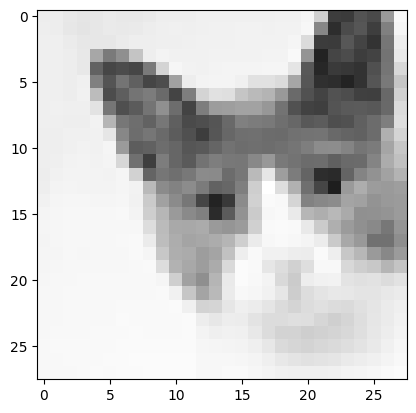

In [25]:
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import imshow

imshow(vector_to_image(x))

In [1030]:
# x[100:200] = numpy.random.random(100)

> **Paso 1**: Encoder (pasar de `x` a `z`)

La imagen representada como un vector `x` de características

In [27]:
x = image_to_vector(image)
x

array([0.92941176, 0.92941176, 0.90980392, 0.89803922, 0.90588235,
       0.91764706, 0.90980392, 0.90980392, 0.91764706, 0.93333333,
       0.93333333, 0.93333333, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94509804, 0.94509804,
       0.96078431, 0.81568627, 0.23921569, 0.23137255, 0.3254902 ,
       0.29019608, 0.60392157, 0.97254902, 0.93333333, 0.92941176,
       0.90588235, 0.89411765, 0.90588235, 0.91764706, 0.91372549,
       0.91764706, 0.92941176, 0.9372549 , 0.94117647, 0.9372549 ,
       0.94117647, 0.94509804, 0.94509804, 0.94901961, 0.94901961,
       0.94509804, 0.94901961, 0.94901961, 0.96862745, 0.52941176,
       0.17647059, 0.29411765, 0.3372549 , 0.24313725, 0.50196078,
       0.96078431, 0.9372549 , 0.9372549 , 0.92156863, 0.90588235,
       0.90588235, 0.90588235, 0.92156863, 0.93333333, 0.93333333,
       0.9372549 , 0.9372549 , 0.94117647, 0.94509804, 0.94509804,
       0.94509804, 0.94901961, 0.94901961, 0.94901961, 0.94901

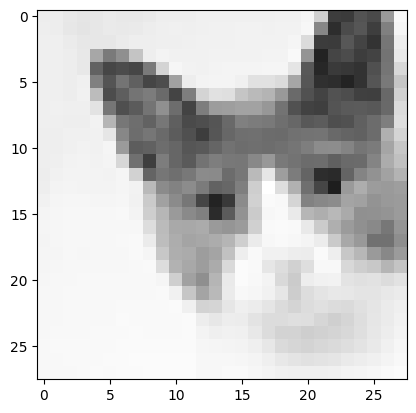

In [28]:
imshow(vector_to_image(x))

> **Paso 2**: Una capa oculta tipo ReLU llamada `h`

In [29]:
W1 = (2 * numpy.random.random((x.size, x.size)) - 1) * 0.001
b1 = (2 * numpy.random.random() - 1) * 0.001

h = ReLU(Linear(x, W1, b1)) # x:N, W1:NxN, b1:1

h

array([4.27375037e-03, 2.03809402e-02, 2.84633126e-02, 8.82619326e-03,
       7.06657944e-03, 1.07368080e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76154528e-02,
       1.56211002e-02, 6.09074841e-03, 4.48191938e-03, 0.00000000e+00,
       0.00000000e+00, 1.01658325e-02, 8.39885960e-03, 0.00000000e+00,
       0.00000000e+00, 5.35727813e-03, 2.61924235e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.28142505e-03, 4.48585758e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09366007e-02, 1.60616190e-03, 0.00000000e+00,
       8.18726835e-04, 0.00000000e+00, 2.30452239e-02, 5.20798870e-03,
       0.00000000e+00, 2.20357027e-02, 0.00000000e+00, 0.00000000e+00,
       1.58221349e-02, 0.00000000e+00, 8.56524421e-03, 2.15260966e-03,
       6.84594684e-03, 5.90336893e-03, 1.33205737e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05430337e-02, 1.90466283e-02,
      

In [30]:
dim_latente = 2

W_mu = (2 * numpy.random.random((x.size, dim_latente)) - 1)
b_mu = (2 * numpy.random.random() - 1)
W_log_var = (2 * numpy.random.random((x.size, dim_latente)) - 1)
b_log_var = (2 * numpy.random.random() - 1)

mu = ReLU(Linear(h, W_mu, b_mu)) # Nx2

log_var = ReLU(Linear(h, W_log_var, b_log_var)) # Nx2
log_var = numpy.clip(log_var, -10, 10)

mu, log_var

(array([0., 0.]), array([0.75777098, 0.63662769]))

> **Paso 3**: Reparametrización (generar `z`)

In [31]:
sigma = numpy.exp(0.5 * log_var)
epsilon = numpy.random.normal(0, 1, dim_latente)

z = mu + sigma.dot(epsilon) # sampling

z

array([-0.12313966, -0.12313966])

> **Paso 4**: Decoder (pasa de `z` a `x`)

In [32]:
W2 = (2 * numpy.random.random((dim_latente, x.size)) - 1) * 0.0001
b2 = numpy.random.random()

h_dec = ReLU(Linear(z, W2, b2)) # 2xN

h_dec

array([0.74566337, 0.74564243, 0.74564925, 0.74563558, 0.74564903,
       0.74563411, 0.7456545 , 0.74566173, 0.74564509, 0.74563475,
       0.74564384, 0.74562929, 0.74565999, 0.74564663, 0.74565196,
       0.74565202, 0.745644  , 0.74565363, 0.74563012, 0.74562994,
       0.74565469, 0.74564253, 0.74565423, 0.74562765, 0.74565009,
       0.74565376, 0.74564274, 0.74565001, 0.7456473 , 0.74563284,
       0.74563322, 0.74564824, 0.74563513, 0.74566556, 0.74564036,
       0.74565573, 0.74564405, 0.7456525 , 0.74565297, 0.74564483,
       0.74561954, 0.74563931, 0.74563892, 0.74564953, 0.74565271,
       0.74565135, 0.7456418 , 0.74563017, 0.74562825, 0.74563502,
       0.74562874, 0.74563589, 0.74563587, 0.74563251, 0.74563817,
       0.74564353, 0.74564375, 0.74563184, 0.74565147, 0.74565693,
       0.74563516, 0.7456336 , 0.7456458 , 0.74565469, 0.74564272,
       0.7456477 , 0.74563643, 0.74563171, 0.74563732, 0.74565317,
       0.74565253, 0.74564087, 0.74564076, 0.74564699, 0.74563

In [33]:
W3 = (2 * numpy.random.random((x.size, x.size)) - 1) * 0.001
b3 = numpy.random.random() * 0.001

x_recon = Sigmoid(Linear(h_dec, W3, b3)) # NXN

x_recon

array([0.49548799, 0.5038442 , 0.49419229, 0.49905089, 0.50544465,
       0.48994598, 0.49724351, 0.5067379 , 0.50439348, 0.50968834,
       0.49937659, 0.50979909, 0.5006682 , 0.49887979, 0.50080579,
       0.49420898, 0.50119289, 0.50434253, 0.50163039, 0.50000541,
       0.49455813, 0.50113535, 0.49967702, 0.49767609, 0.49372227,
       0.50095059, 0.49934736, 0.50518625, 0.50019492, 0.50264184,
       0.49588537, 0.49870135, 0.50004204, 0.50143756, 0.49898484,
       0.5006035 , 0.49999238, 0.49619096, 0.50362621, 0.50371716,
       0.49444026, 0.50467181, 0.5008508 , 0.496515  , 0.49976693,
       0.49985854, 0.50001555, 0.50249732, 0.50343388, 0.49799713,
       0.50260852, 0.49988349, 0.50050803, 0.49964074, 0.49524988,
       0.49714225, 0.50533546, 0.49763089, 0.50181274, 0.50293358,
       0.49568589, 0.50078811, 0.50307993, 0.49681711, 0.50030103,
       0.50139878, 0.49590628, 0.49982787, 0.50045956, 0.50131166,
       0.50038116, 0.49946349, 0.49166012, 0.50757215, 0.50182

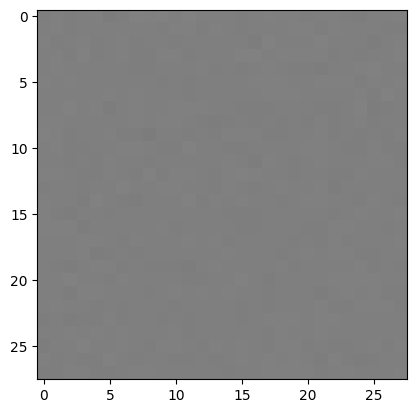

In [34]:
imshow(vector_to_image(x_recon))

$$
y, \hat{y}
$$

MSE

$$
\frac{1}{n} \sum (y - \hat{y})^2
$$

BCE

$$
-\sum y \cdot log(\hat{y}) + (1 - y) \cdot log(1 - \hat{y}) 
$$

In [1040]:
-(0.3 * numpy.log(0.4) + (1 - 0.3) * numpy.log(1 - 0.3))

0.5245596803193592

In [35]:
recon_loss = -(x.dot(numpy.log(x_recon)) + (1 - x).dot(numpy.log(1 - x_recon))).sum()

recon_loss

543.2721767944208

VAE - KL (Divergencia entre las normales N(mu, sigma^2) -> N(0, 1))

In [36]:
kl_loss = -0.5 * (1 + log_var - mu ** 2 - numpy.exp(log_var)).sum()

kl_loss

0.31460636315766133

$$
\frac{\partial L}{\partial x_{recon}} \; x_{recon} - x
$$



In [37]:
delta_x = x_recon - x

dW3 = h_dec.T.dot(delta_x) # W3
db3 = delta_x.sum(axis=0) # b3

dW3, db3

(-151.74885336381124, -203.51406933610525)

In [39]:
delta_h_dec = delta_x.dot(W3.T)

delta_h_dec[h_dec <= 0] = 0

delta_h_dec

array([-3.61002973e-03,  4.68447896e-03,  4.48236171e-03, -3.73904964e-03,
        1.11639417e-03,  1.45794153e-03,  2.40589450e-03,  1.29248606e-03,
        3.73399994e-03, -1.22909787e-02,  4.15637505e-03, -7.42672339e-03,
        1.44583267e-03, -1.49174576e-02,  1.25186975e-03, -4.89711622e-03,
       -5.62184383e-03, -9.10887811e-04, -5.13172826e-03,  2.74773944e-03,
        3.66593988e-03, -1.12499140e-03,  3.46230142e-03,  4.77175241e-03,
        3.83644414e-03,  1.07383539e-03,  7.79256288e-03,  6.57861715e-03,
        1.08666088e-02, -5.44845614e-03,  2.73523801e-03,  5.46543582e-03,
        2.10259888e-03,  7.82572414e-04,  6.44604224e-04, -7.37595052e-03,
       -2.86919342e-03,  4.16613085e-03,  4.74910540e-03, -1.28749636e-02,
       -6.06447759e-03,  8.05054131e-03, -9.55630473e-03,  4.82179749e-03,
       -1.58329568e-02, -2.13509851e-03, -1.08560916e-03, -5.43741236e-04,
       -1.08049235e-03,  5.58882272e-03,  5.30034702e-03, -4.77825926e-03,
       -1.47064069e-03,  

In [40]:
z.reshape(-1, 1).shape, delta_h_dec.reshape(-1 , 1).shape

((2, 1), (784, 1))

In [41]:
dW2 = z.reshape(-1, 1).dot(delta_h_dec.reshape(-1 , 1).T)
db2 = delta_h_dec.sum(axis=0)

delta_z = delta_h_dec.dot(W2.T)

dW2.shape

(2, 784)

In [42]:
delta_mu = delta_z
delta_sigma = delta_z * epsilon

delta_log_var = delta_sigma * 0.5 * numpy.exp(0.5 * log_var)

delta_mu += mu
delta_log_var += 0.5 * (numpy.exp(log_var) - 1)

In [43]:
dW_mu = h.reshape(-1, 1).dot(delta_mu.reshape(-1, 1).T)
db_mu = delta_mu.sum(axis=0)

delta_h_mu = delta_mu.dot(W_mu.T)
delta_h_mu[h <= 0] = 0

dW_log_var = h.reshape(-1, 1).dot(delta_log_var.reshape(-1, 1).T)
db_log_var = delta_log_var.sum(axis=0)

delta_h_log_var = delta_log_var.dot(W_log_var.T)
delta_h_log_var[h <= 0] = 0

# combinar gradientes hacia h
delta_h = delta_h_mu + delta_h_log_var

In [44]:
dW1 = x.T.dot(delta_h)
db1 = delta_h.sum(axis=0)

# gradiente hacia x si se necesita
delta_x_input = delta_h.dot(W1.T)

delta_x_input

array([ 2.52079186e-03,  3.60431206e-03,  9.42639487e-03,  5.00647003e-04,
        5.56610358e-04,  3.09548659e-03, -5.81844284e-03,  7.74139964e-04,
        4.68907939e-04,  7.22476196e-03, -9.17879077e-03, -2.88963381e-03,
       -2.28259548e-03, -3.05018068e-03,  1.92877303e-03,  3.10430476e-03,
        1.42567740e-05, -1.02870698e-03, -2.89294382e-03, -2.82871239e-03,
        5.35096569e-03,  5.64685192e-03,  4.75136730e-04, -3.44457310e-04,
       -2.81214160e-03, -5.00161318e-03, -5.54067015e-03,  4.15041598e-03,
       -4.82765628e-03, -2.28010796e-03,  9.50120356e-03,  1.23745673e-03,
        2.70319205e-04, -9.37187629e-03, -4.74066274e-04, -4.15909662e-04,
        2.63164277e-03,  3.35385639e-03,  4.98657785e-03, -2.77788247e-03,
       -4.87022856e-03, -1.57808543e-03,  9.12874264e-03, -5.45627397e-03,
        1.40908849e-03, -7.27077530e-03,  2.55729238e-03,  3.72177174e-03,
       -4.02252929e-03,  2.07057402e-03,  6.27349795e-03,  2.96902173e-03,
       -1.90149595e-03, -

In [45]:
lr = 0.001 # learning rate

W3 -= lr * dW3
b3 -= lr * db3

W2 -= lr * dW2
b2 -= lr * db2

W_mu -= lr * dW_mu
b_mu -= lr * db_mu

W_log_var -= lr * dW_log_var
b_log_var -= lr * db_log_var

W1 -= lr * dW1
b1 -= lr * db1

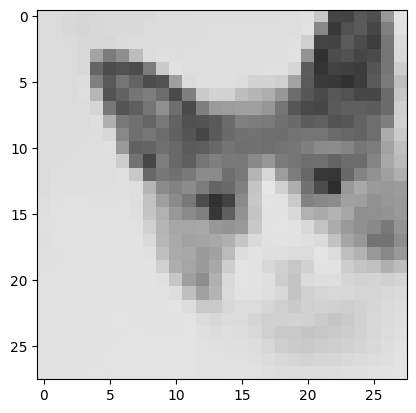

In [51]:
for epoch in range(10_000):
    # === forward ===
    h = ReLU(x @ W1 + b1)
    mu = h @ W_mu + b_mu
    log_var = numpy.clip(h @ W_log_var + b_log_var, -10, 10)
    sigma = numpy.exp(0.5 * log_var)
    epsilon = numpy.random.randn(dim_latente)
    z = mu + sigma * epsilon
    h_dec = ReLU(z @ W2 + b2)
    x_recon = Sigmoid(h_dec @ W3 + b3)

    # === loss ===
    eps = 1e-8
    recon_loss = -(x * numpy.log(x_recon + eps) + (1 - x) * numpy.log(1 - x_recon + eps)).sum()
    kl_loss = -0.5 * numpy.mean(1 + log_var - mu**2 - numpy.exp(log_var))
    loss = recon_loss + kl_loss

    # === backward ===
    delta_x = x_recon - x

    dW3 = numpy.outer(h_dec, delta_x)
    db3 = delta_x

    delta_h_dec = delta_x @ W3.T
    delta_h_dec[h_dec <= 0] = 0

    dW2 = numpy.outer(z, delta_h_dec)
    db2 = delta_h_dec

    delta_z = delta_h_dec @ W2.T

    delta_mu = delta_z + mu / len(mu)   # KL contribución
    delta_sigma = delta_z * epsilon
    delta_log_var = delta_sigma * 0.5 * sigma + 0.5 * (numpy.exp(log_var) - 1) / len(log_var)

    dW_mu = numpy.outer(h, delta_mu)
    db_mu = delta_mu
    delta_h_mu = (delta_mu @ W_mu.T) * (h > 0)

    dW_log_var = numpy.outer(h, delta_log_var)
    db_log_var = delta_log_var
    delta_h_log_var = (delta_log_var @ W_log_var.T) * (h > 0)

    delta_h = delta_h_mu + delta_h_log_var

    dW1 = numpy.outer(x, delta_h)
    db1 = delta_h

    # === update ===
    lr = 0.001
    W3 -= lr * dW3; b3 -= lr * db3
    W2 -= lr * dW2; b2 -= lr * db2
    W_mu -= lr * dW_mu; b_mu -= lr * db_mu
    W_log_var -= lr * dW_log_var; b_log_var -= lr * db_log_var
    W1 -= lr * dW1; b1 -= lr * db1

imshow(vector_to_image(x_recon))

In [52]:
recon_loss

316.92761542034054

In [53]:
kl_loss

5.135429014954679

In [54]:
mu, sigma

(array([ 0.04258839, -3.92185061]), array([0.80751165, 0.04790611]))

In [58]:
W1

array([[-0.02287136, -0.02331658, -0.02251909, ..., -0.02397575,
        -0.02243023, -0.02365259],
       [-0.02284392, -0.02404994, -0.02324941, ..., -0.02396558,
        -0.02380913, -0.02310307],
       [-0.02307995, -0.02292876, -0.02232116, ..., -0.02336418,
        -0.02416406, -0.02362594],
       ...,
       [-0.02421019, -0.02287374, -0.02251034, ..., -0.02340563,
        -0.02326352, -0.02378172],
       [-0.02309629, -0.02293443, -0.0241496 , ..., -0.0242278 ,
        -0.0230526 , -0.02407607],
       [-0.02253775, -0.02263991, -0.02424568, ..., -0.02374064,
        -0.02349485, -0.02410021]])

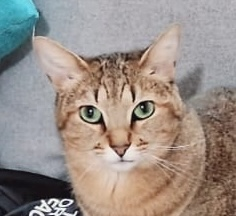

In [59]:
# pip install pillow
from PIL import Image

image2 = Image.open("amelie.png")

image2

In [60]:
n = min(image2.width, image2.height)
m = max(image2.width, image2.height)
x1, y1 = 0, 0
x2, y2 = n, n
image_x2 = image2.convert("L").crop((x1, y1, x2, y2)).resize((28, 28))
image_x2

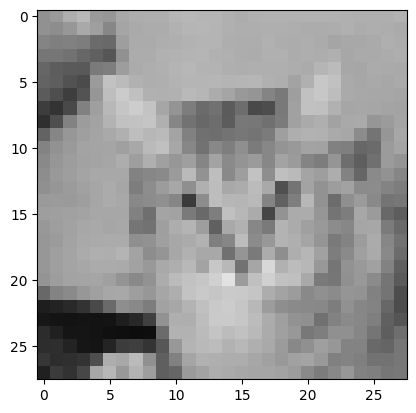

In [61]:
x2 = image_to_vector(image2)

imshow(vector_to_image(x2))

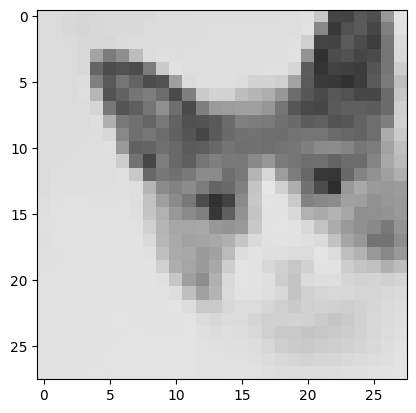

In [ ]:
h = ReLU(x2 @ W1 + b1)
mu = h @ W_mu + b_mu
log_var = h @ W_log_var + b_log_var
sigma = numpy.exp(0.5 * log_var)
epsilon = numpy.random.randn(dim_latente)
z = mu + sigma * epsilon
h_dec = ReLU(z @ W2 + b2)
x2_recon = Sigmoid(h_dec @ W3 + b3)

imshow(vector_to_image(x2_recon))